In [58]:
import keras
keras.__version__

'2.10.0'

In [59]:
import numpy as np
import matplotlib.pyplot as plt


# Logistic regression as an intro. to Neural Networks

This notebook **adapts** the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

**We will see this first as a Logistic (= classification) Regression problem, and then we will see exactly the same process but using keras modules (once we know what an Artificial Neural Network is and how it is computed).**


The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [60]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

**IMPORTANT: THINK ON WHAT YOU SHOULD DO TO USE THE X -PREDICTORS- IN THE SAME WAY AS YOU DID IN SCI-KIT LEARN PREVIOUS EXAMPLE**

In [61]:
train_images.shape

(60000, 28, 28)

In [62]:
type(train_images)

numpy.ndarray

In [63]:
print(train_images.dtype)

uint8


In [64]:
train_images[0:5, 15:20, 15:20]

array([[[186, 253, 253, 150,  27],
        [ 16,  93, 252, 253, 187],
        [  0,   0, 249, 253, 249],
        [130, 183, 253, 253, 207],
        [253, 253, 253, 250, 182]],

       [[  0,   0,   0,   0,   0],
        [  0,   0,   0,   7, 135],
        [  0,   0,   7, 131, 252],
        [  0,  48, 165, 252, 173],
        [114, 238, 253, 162,   0]],

       [[ 91,  28,   5, 233, 250],
        [  0,   0, 102, 254, 220],
        [  0,   0, 169, 254, 137],
        [  0,   0, 169, 254,  57],
        [  0,   0, 169, 254,  57]],

       [[159,   0,   0,   0,   0],
        [ 39,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]],

       [[252, 231,   0,   0,   0],
        [252, 143,   0,   0,   0],
        [253, 109,   0,   0,   0],
        [252,  21,   0,   0,   0],
        [252,  21,   0,   0,   0]]], dtype=uint8)

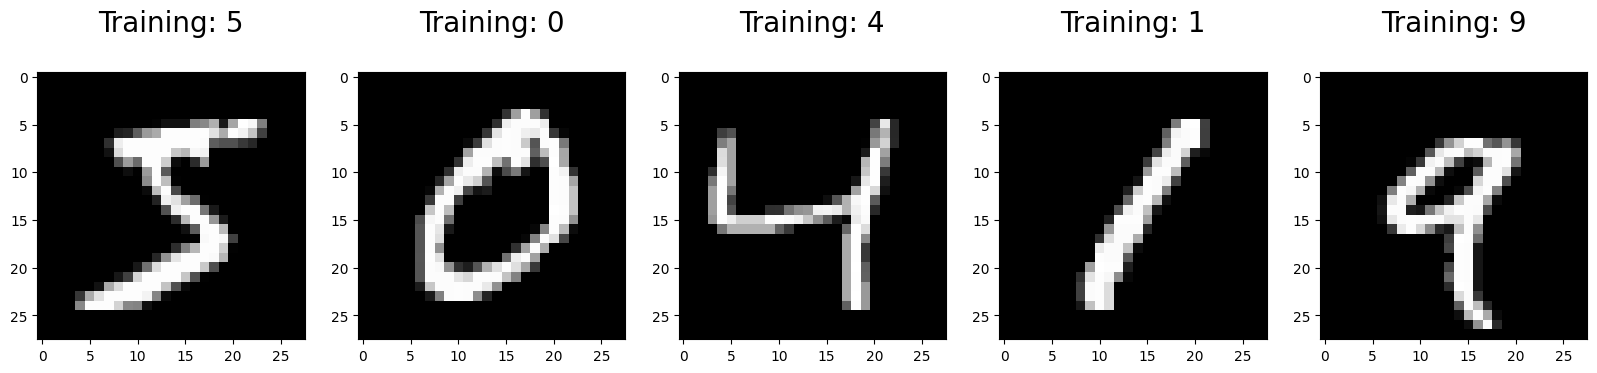

In [65]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**HINT (and an advance on numpy matrices):**

For convenience, you should now reshape images of shape (num_px, num_px, 1) -monochrome, CAVEAT THIS WILL BE DIFFERENT WITH RGB IMAGES- in a numpy-array of shape (num_px ∗ num_px). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

A trick when you want to flatten a matrix X of shape (a,b,c) to a matrix X_flatten of shape (a, b∗c) is to use:

X_flatten = X.reshape(X.shape[0], -1)

In [66]:
X_train = train_images.reshape(train_images.shape[0], -1)

In [67]:
X_train.shape

(60000, 784)

In [68]:
y_train = train_labels

In [69]:
len(y_train)

60000

In [70]:
print(type(y_train))

<class 'numpy.ndarray'>


In [71]:
y_train.shape

(60000,)

In [72]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Do the same with test set. Will you have to do same as you did with the training set?

In [73]:
test_images.shape

(10000, 28, 28)

In [74]:
X_test = test_images.reshape(test_images.shape[0], -1)

In [75]:
X_test.shape

(10000, 784)

In [76]:
y_test = test_labels

In [77]:
len(y_test)

10000

In [78]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Display some MNIST digits

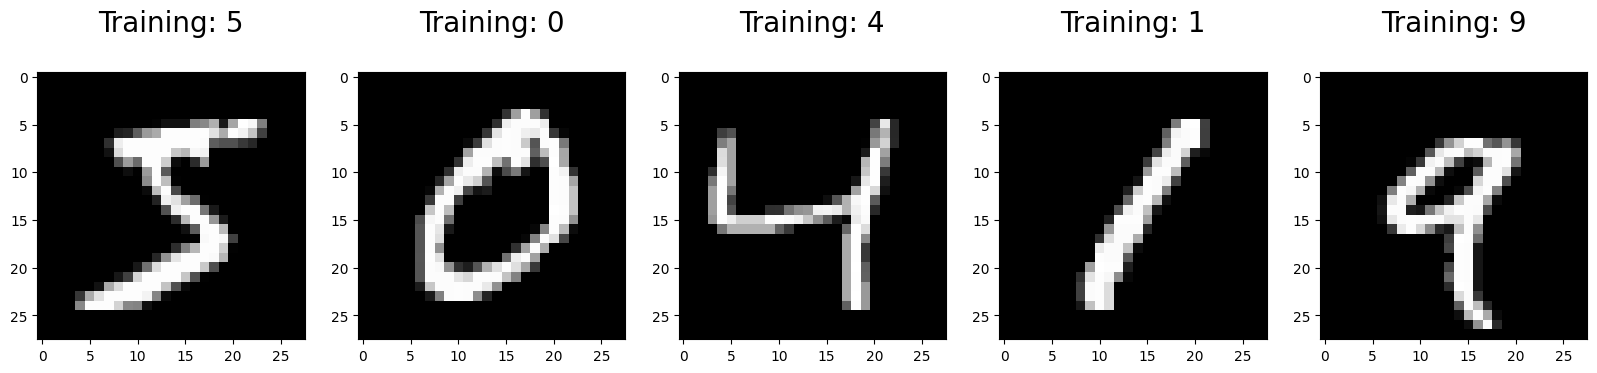

In [79]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


# Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

## Step 1. Import the model you want to use

In [80]:
from sklearn.linear_model import LogisticRegression

## Step 2. Make an instance of the Model

In [120]:
logistic_reg = LogisticRegression()

In [121]:
print(logistic_reg)

LogisticRegression()


## Step 3. Training the model on the data, storing the information learned from the data

In [122]:
logistic_reg.fit(X_train, y_train)

C:\Users\joaquin.bazterrica\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 4. Predict labels for new data (new images)

In [129]:
logistic_reg.coef_[:,250:260]

array([[-9.57974964e-04, -6.29951395e-05, -9.99103306e-08,
        -2.32018078e-06,  4.14052529e-05,  2.29279270e-04,
        -4.45879316e-04, -1.57607671e-04, -7.26029624e-04,
        -8.23749053e-04],
       [-1.00136650e-04, -1.68419821e-05, -1.80863793e-07,
        -4.88829008e-05, -9.99261549e-05, -7.24239733e-05,
        -5.76273344e-04, -1.90049795e-03, -1.68993993e-03,
        -7.68022414e-04],
       [-1.49361823e-04, -1.90769520e-05, -1.13319135e-07,
        -9.57126113e-06, -2.39336743e-04,  2.38286792e-04,
         1.13403635e-03,  2.20312871e-03, -1.00429843e-03,
        -6.25021063e-04],
       [-5.59628406e-05, -1.64116533e-06, -8.80630204e-07,
        -3.38532455e-05,  2.25054564e-04,  1.21505432e-03,
         3.15647228e-03,  7.69399556e-04,  4.73562512e-04,
         1.16750430e-03],
       [-6.84646446e-05, -7.53639484e-05, -4.76724103e-06,
        -9.69590480e-05,  1.64711390e-05, -8.46858283e-04,
        -9.85362569e-04,  2.65434541e-05, -4.71469225e-04,
        -1.

In [124]:
logistic_reg.predict(X_test[0].reshape(1,-1))

array([7], dtype=uint8)

In [125]:
logistic_reg.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

## Make predictions on entire test data

In [126]:
predictions = logistic_reg.predict(X_test)
print(predictions)

[7 2 1 ... 4 5 6]


# Measuring Model Performance (Digits Dataset)

In [127]:
score = logistic_reg.score(X_test, y_test)
print(score)

0.9255


## Confusion Matrix (Digits Dataset)

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [109]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


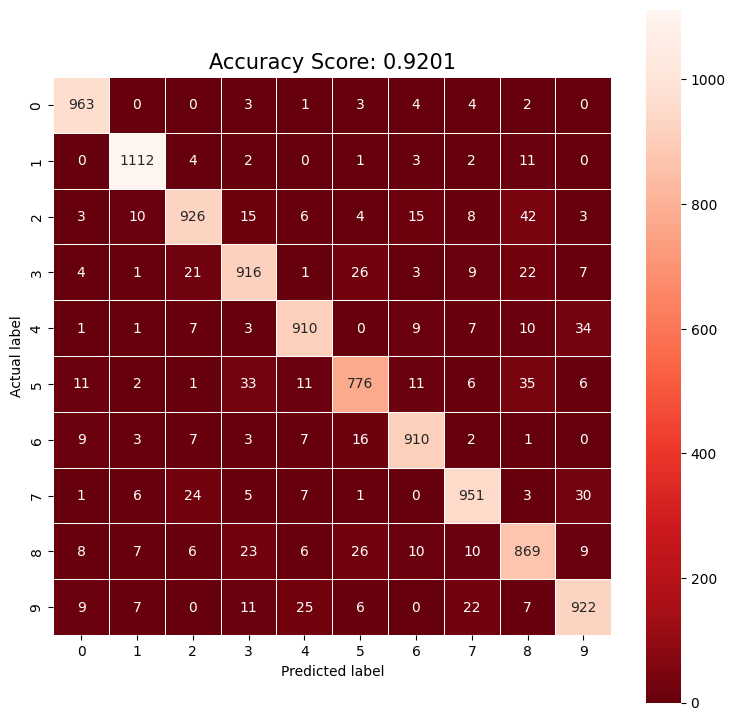

In [115]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, 
            fmt=".0f", 
            linewidths=.5, 
            square = True, 
            cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);